In [2]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import sys

def plot_relaxdb_labels(row, data_type='R2_R1',ymin=None,ymax=None):
    plot(np.arange(row['seq length']), row[data_type],color='black',zorder=5,linewidth=0.5) 
    if data_type=='R2_R1':
        plot(np.arange(row['seq length']), row['scaled_R2_R1_pred'],color='grey',zorder=5) 
        
    ax = gca()
    if ymin is None and ymax is None:
        ymin, ymax = ax.get_ylim()
    else:
        ylim([ymin,ymax])
        
    p_pos = ymin + 0.05*(ymax - ymin)
    star_pos = ymin + 0.9*(ymax - ymin)

    for j, char in enumerate(row['sequence']):
        if char=='P':
            axvline(j, color='tab:purple',alpha=0.5, linewidth=0.5)
            text(j-0.5, p_pos,'P', color='tab:purple',fontsize=5,weight='bold')

        elif row['missing_peaks'][j]=='.':
            axvline(j, color='tab:red',alpha=0.5, linewidth=0.5)
            scatter([j],[star_pos],marker='*', color='tab:red')

        if row['label'][j] == '^' or row['label'][j] == 'b':
            errorbar(j,row[data_type][j],yerr=row[data_type+'_err'][j], color='tab:orange',zorder=10, fmt='.')

        if row['label'][j] =='v':
            errorbar(j,row[data_type][j],yerr=row[data_type+'_err'][j], color='tab:blue',zorder=10, fmt='.')

        if row['label'][j] == 'A':
            errorbar(j,row[data_type][j],yerr=row[data_type+'_err'][j], color='black',zorder=10, fmt='.')
            
        if row['label'][j] == 't':
            errorbar(j,row[data_type][j],yerr=row[data_type+'_err'][j], color='grey',zorder=10, fmt='.')
            
        if row['label'][j] == 'x':
            axvline(j, color='grey',alpha=0.5, linewidth=0.5)
            
    xlim([-1,row['seq length']+1])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
dd = pd.read_json('RelaxDB_133x_22jan2025.json.zip')
for col in dd.columns:
    if isinstance(dd[col].iloc[0],list):
        dd[col] = [np.asarray(x,dtype=float) for x in dd[col]]

print(len(dd))

133


| RelaxDB token | Description                                            |
|:--------|:---------------------------------------------------------------|
| `A`    | no motion label                                               |
| `.`    | peak missing                                                  |
| `^`    | rex  (dR2 > mean + 1 std dev for dataset                      |
| `v`    | ps-ns motion (hetNOE <= 0.65)                                 |
| `b`    | both fast and slow motion (dR2 as in `^`, hetNOE as in `v`)   |
| `t`    | no data: disordered terminus, not included in HYDRONMR        |
| `x`    | no data: R1/R2/NOE not reported                               |
| `p`    | no data: proline, no amide hydrogen                           |

In [188]:
#example for one of the label strings
dd.loc[dd.entry_ID=='IL13']['label'].iloc[0]

'.tptpptxxxAAAxAAAAAAAAAxvvpvAAxAxAAAAxAAAxAAAxAAAAAxAAAxA.AAAAAAxAxAAAApAAAxxAxxx.xAAxxAAAAAAAxAAxxAAAAAAAAxAttvv'

Text(0.5, 0, 'GB3 residue')

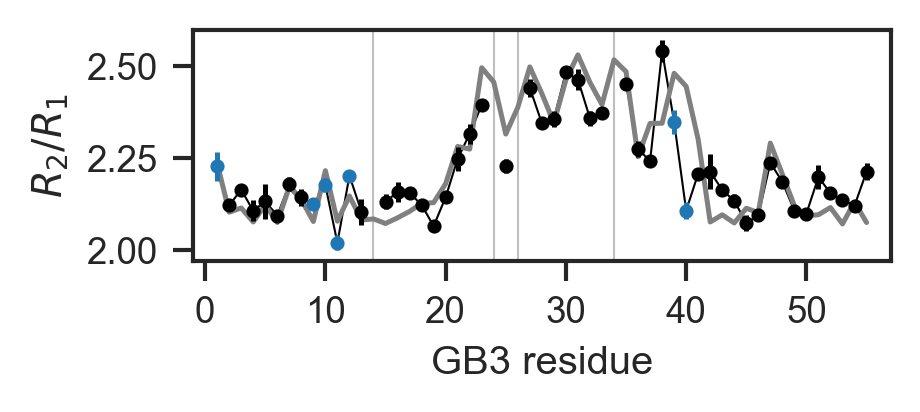

In [8]:
# Plot R2/R1 data is default data type
figure(figsize=(3,1))

plot_relaxdb_labels(dd.loc['5839'])
ylabel(r'$R_2/R_1$')
xlabel('GB3 residue')

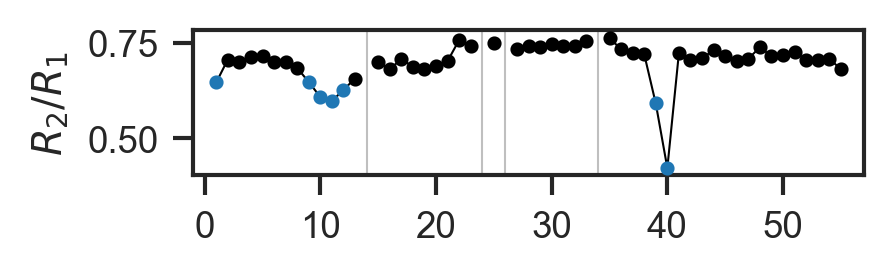

In [9]:
# Plot NOE data
figure(figsize=(3,1))

plot_relaxdb_labels(dd.loc['5839'],data_type='NOE')
ylabel(r'$R_2/R_1$')

tight_layout()

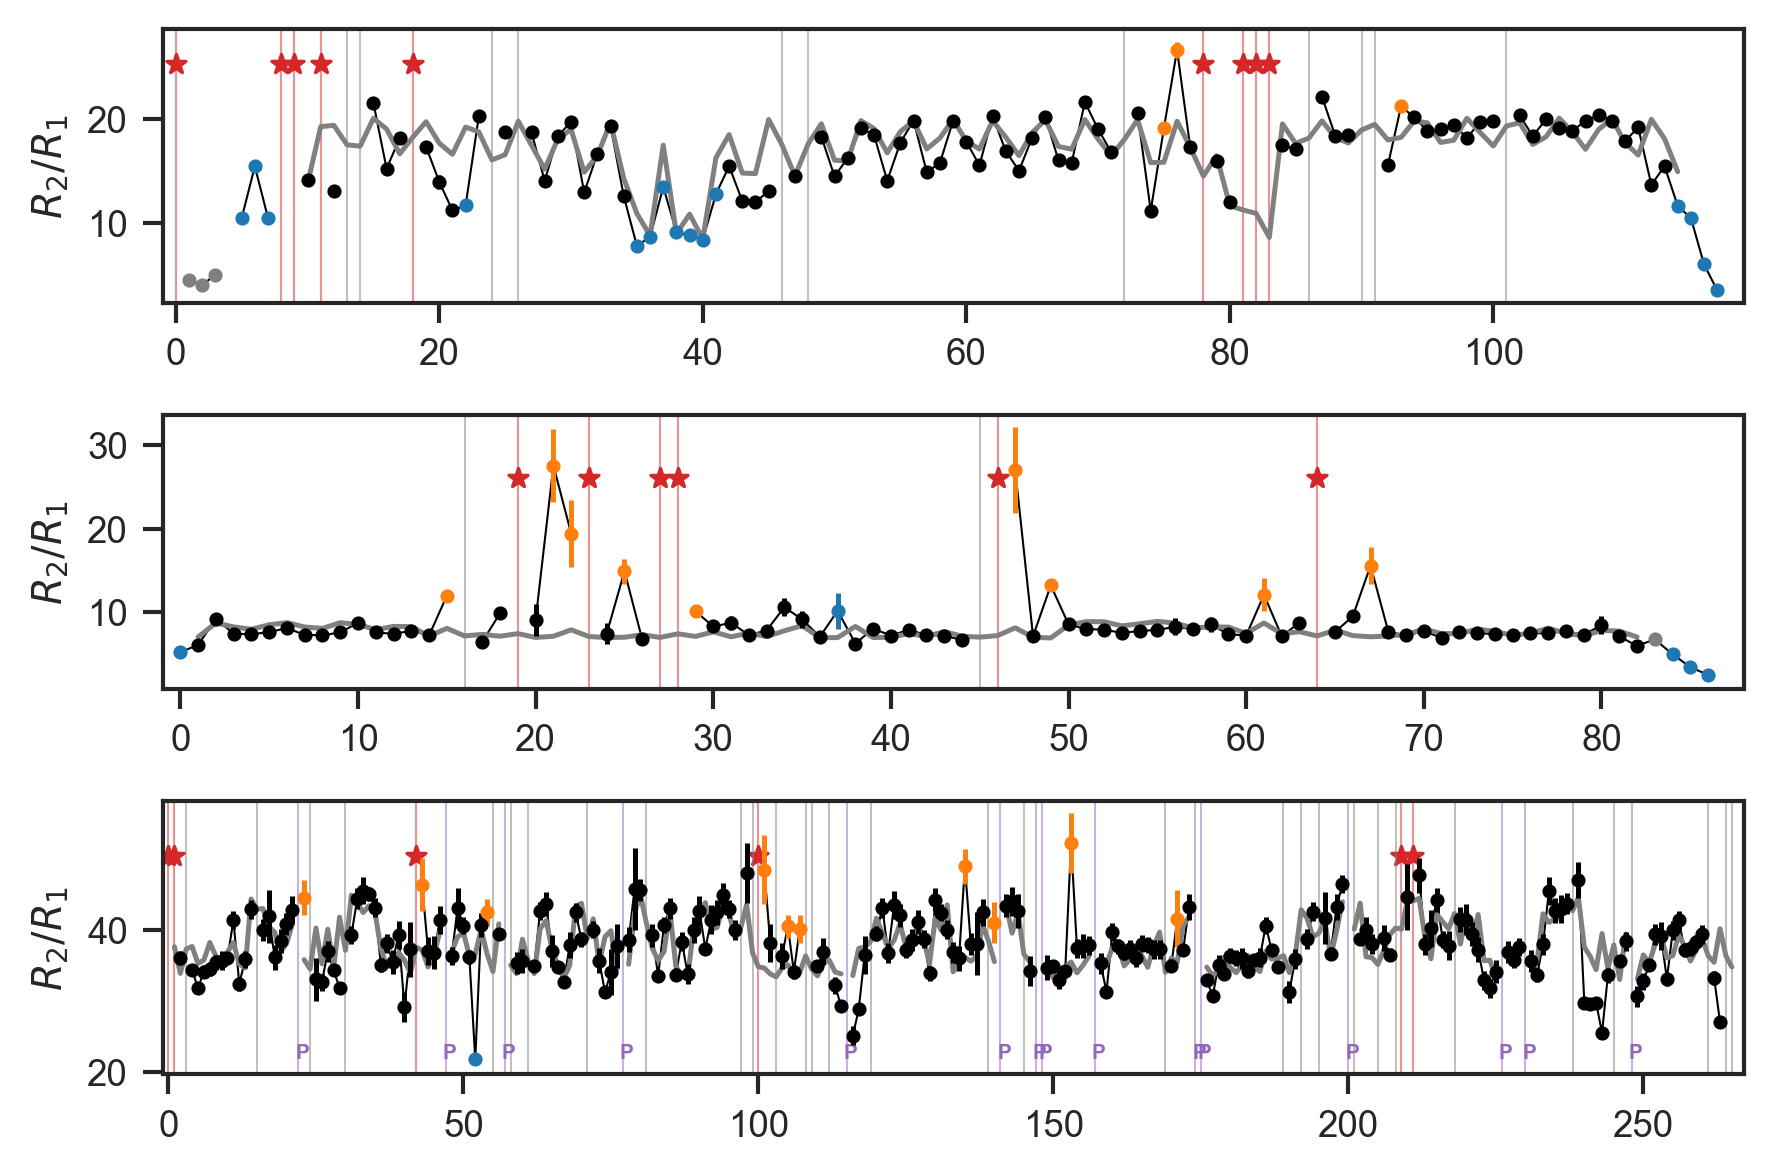

In [10]:
# Fig. 1c
figure(figsize=(6,4))

ex = ['18260','ACRIIA4','27888']

for i,x in enumerate(ex):
    subplot(3,1,i+1)
    plot_relaxdb_labels(dd.loc[x])
    ylabel(r'$R_2/R_1$')
    
tight_layout()

58
56
124


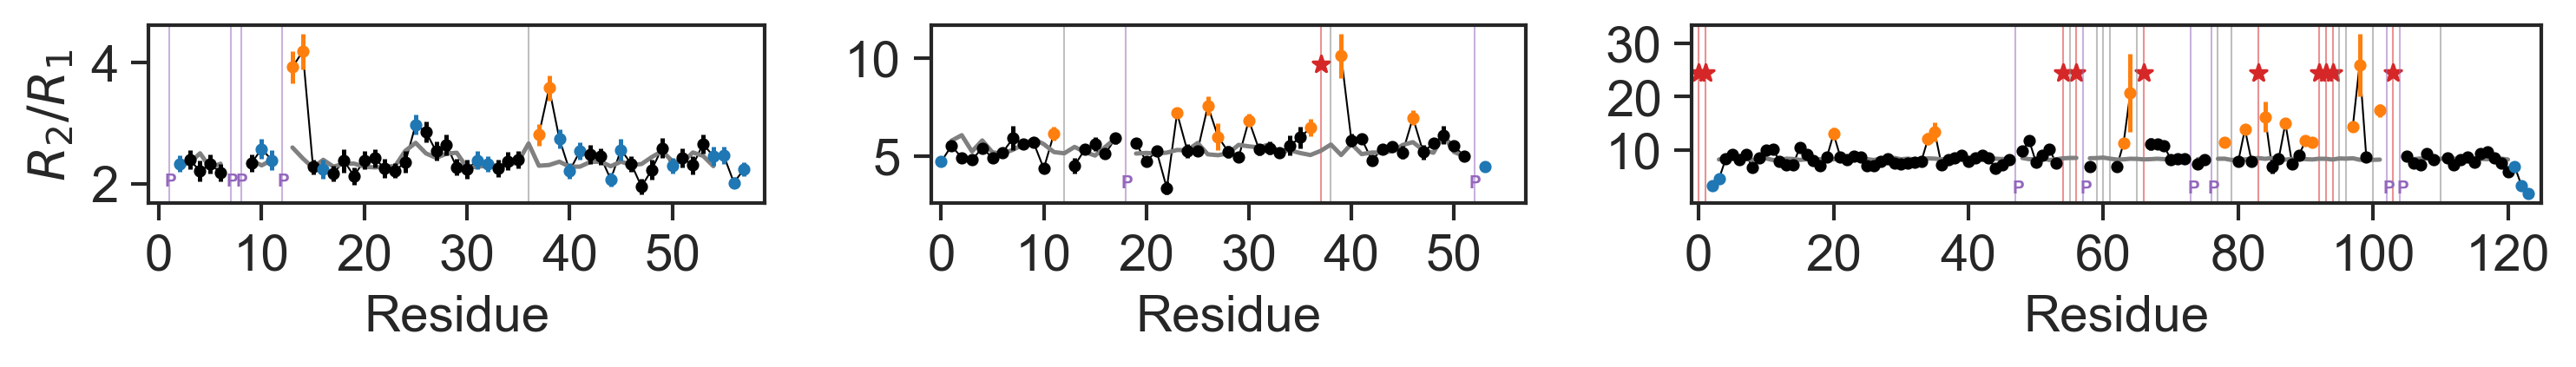

In [11]:
# Fig 4
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,1.5))
gs = GridSpec(1, 3, width_ratios=[58,56,80], figure=fig)

ex = ['BPTI','SMNTD', '4762' ]

for i, x in enumerate(ex):
    ax = fig.add_subplot(gs[0, i])  
    plot_relaxdb_labels(dd.loc[x])
    print(dd.loc[x]['seq length'])
    if i==0:
        ax.set_ylabel(r'$R_2/R_1$')

    for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
    ax.set_xlabel('Residue')

plt.tight_layout()

In [12]:
figure(figsize=(16,40))
i=1
dd['entry_ID'] = [str(x) for x in dd['entry_ID']]
for _, row in dd.sort_index().iterrows():
    subplot(34,4,i)
    plot_relaxdb_labels(row)
    title(row['entry_ID'],loc='left')
    i+=1
    
tight_layout()

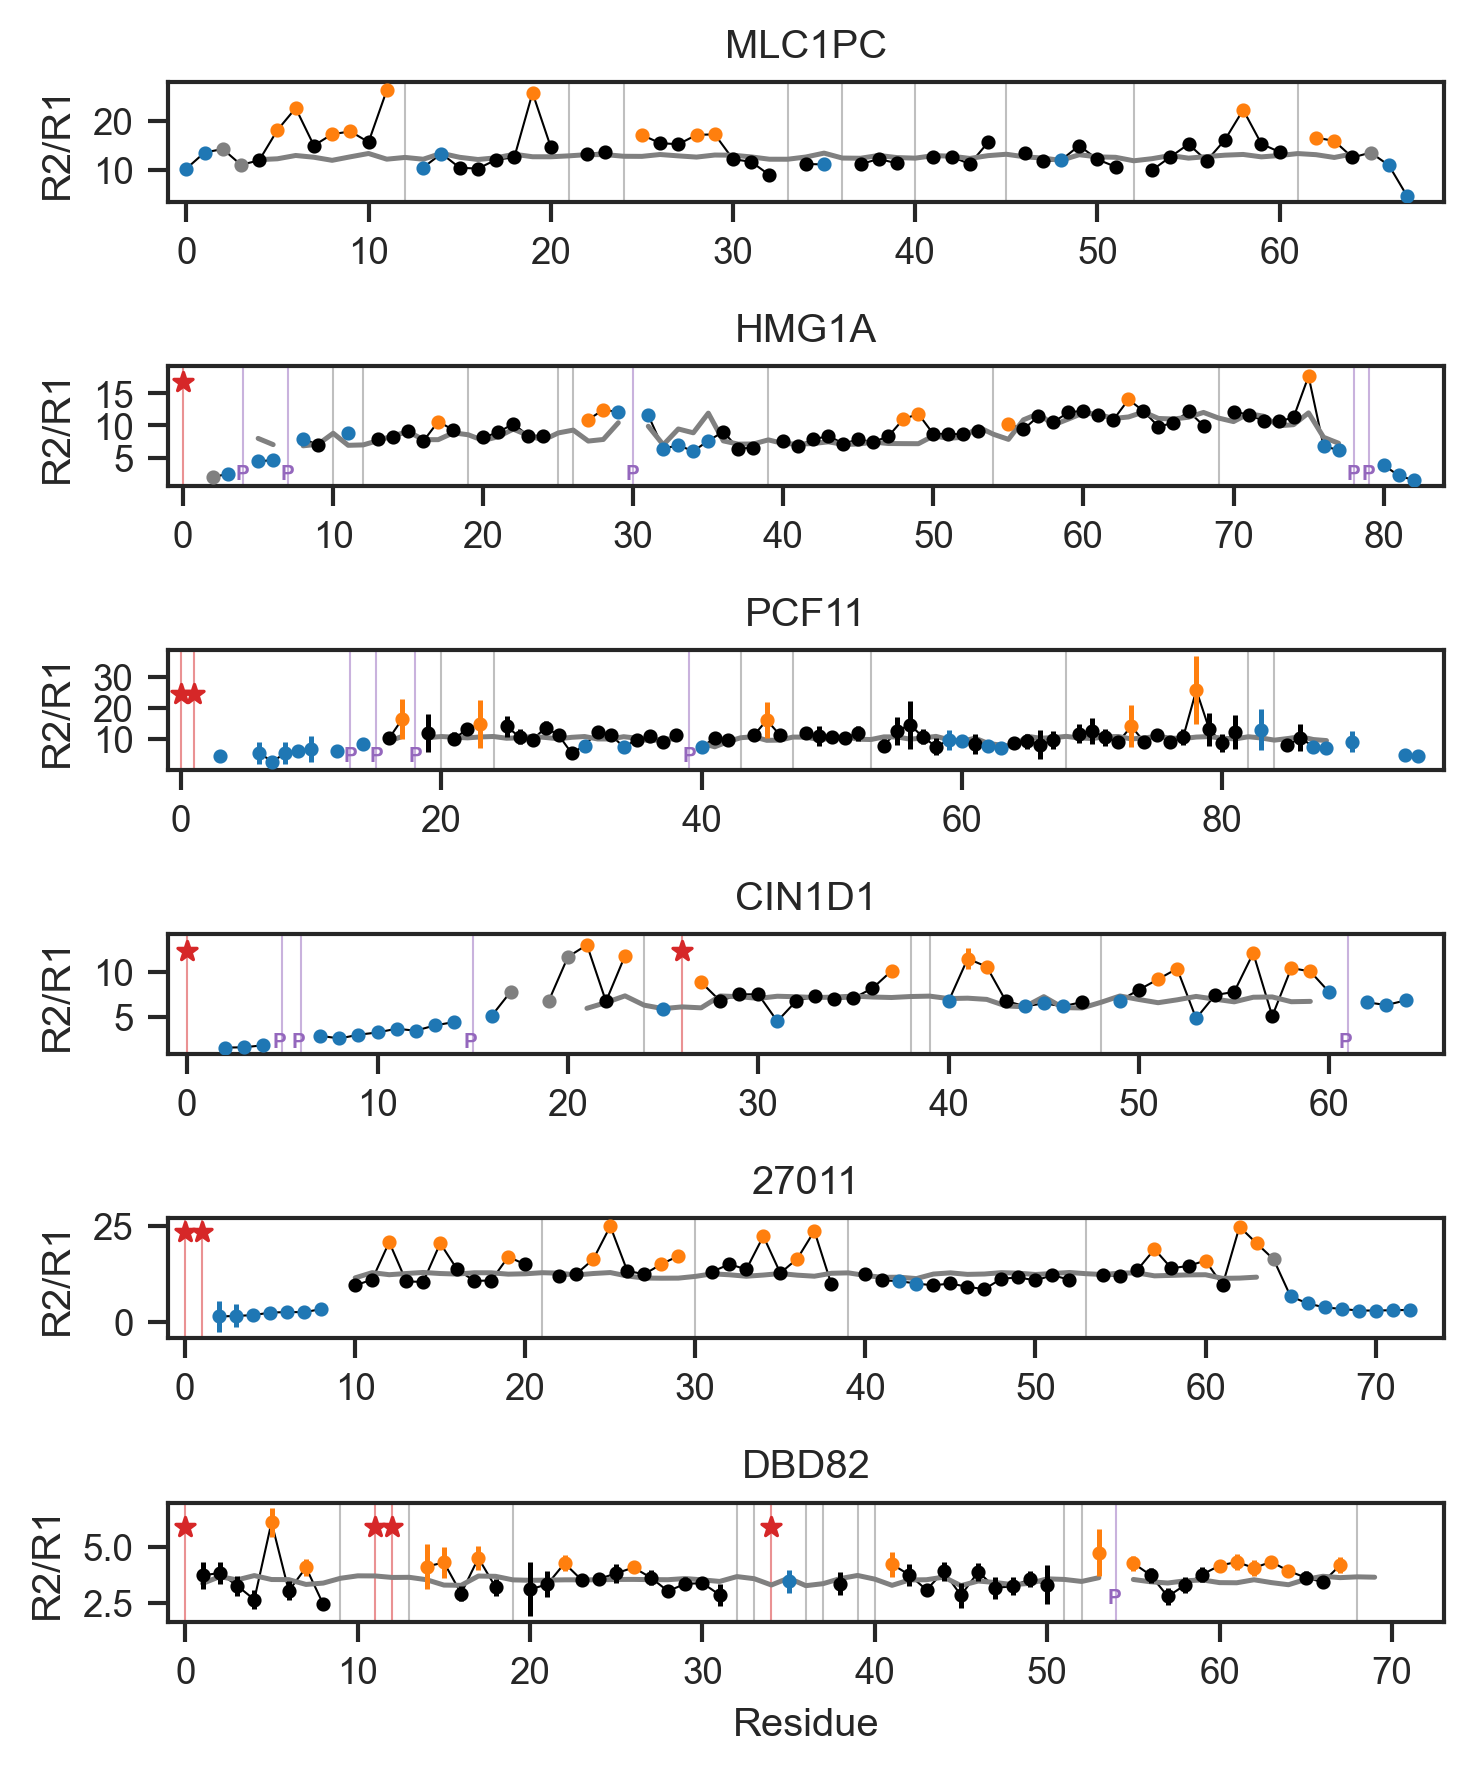

In [13]:
example_had_phosphate = ['MLC1PC','HMG1A', 'PCF11','CIN1D1','27011','DBD82']

figure(figsize=(5,6))
for i, ex in enumerate(example_had_phosphate):
    subplot(6,1,i+1)
    plot_relaxdb_labels(dd.loc[ex])
    ylabel('R2/R1')
    title(ex)
xlabel('Residue')
tight_layout()